In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_classif
%matplotlib inline

# About the Data

In this dataset, we have a collection of over 20000 recipes with data on each recipe's title, rating, caloriecount, protein, fat, sodium, ingredients, and category. The last two have been converted to dummies so we can utilize them.

# Objective

Our objective will be to predict what factors we are likely to see when looking for positive ratings. We are interested in seeing what tags are associated with better ratings, so we will not be using the first size columns in our dataset, and use binary predictors to predict if the rating is positive or negative.

In [2]:
raw_data = pd.read_csv('epi_r.csv')

#Drop missing values
raw_data = raw_data.dropna()

# Drop rows with a rating of 0
raw_data = raw_data[(raw_data['rating'] != 0)]

In [3]:
# Setting up our support vector machine
svr = SVR()

# Target variable
Y = raw_data.rating

# We will not be using these variables in our prediction algorithm
raw_data = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)

In [4]:
Y.describe()

count    14568.000000
mean         4.095535
std          0.655129
min          1.250000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

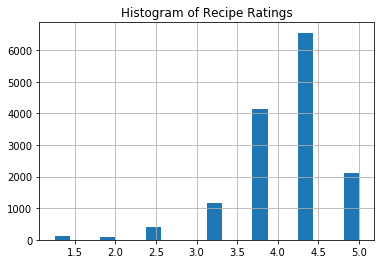

In [5]:
Y.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [6]:
# Replace the 1-5 rating system with 0 for 1-3 and 1 for 3-5
Y = np.where(Y > 4, 1, 0)

# Data Cleaning

Based on our observations regarding ratings in our dataset, we can see that the ratings do not follow a normal distribution, and more than half of our ratings lie above 4/5. Based on the data above, the best place to set the boundary to start appears to be for ratings up to 4 stars, and over 4 stars.

Since we have over 600 features in our dataset, we'll obviously need to do some cleaning before fitting it to our model. To make this as easy as possible, I will be using the kbest module to extract the 30 best features for predicting our ratings.

In [7]:
# Selects the 30 best features to determine rating
kbest = SelectKBest().fit(raw_data,Y)
result_kb = pd.DataFrame(kbest.score_func(raw_data,Y)[1], index=raw_data.columns)
result_kb = result_kb[0].sort_values().head(30)

# Store the values in a new dataframe
X = raw_data[result_kb.index.values.tolist()]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 93 105 163 183 195 213 221 225 226 234 243 288 294 308 319 358 381 394
 397 400 463 489 501 524 567 643 670] are constant.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [8]:
# Fit the svr model
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
# Print the accuracy of our test
svr.score(X, Y)

-0.22440657456904223

In [10]:
# Perform cross validation to determine repeatability
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([-0.25965376, -0.205922  , -0.22800935, -0.26008851, -0.25158983])

# Conclusion

By reducing our featureset from 600+ features to 30, we were able to increase the accuracy of our model from 3.8% to 22.4%. It's still a poor result, but a significant increase in predictive accuracy, nonetheless.